<a href="https://colab.research.google.com/github/DechiWords/Simulation/blob/main/Generacion_Variables_Aleatorias_Continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generación de variables aleatorias continuas

Todas las técnicas para generar una variable aleatoria discreta tienen su análogo en el caso continuo.

## Algoritmo de la transformada inversa

Consideremos una variable aleatoria continua con función de distribución $F$. El método para generarla, llamado de la transformación inversa, se basa en la siguiente proposición.

**PROPOSICIÓN 2.3.1**.

Sea $U$ una variable aleatoria uniforme en $(0,1)$. Para cualquier función de distribución continua $F$ que se pueda obtener su inversa, la variable aleatoria $X$ definida como

$$X = F^{-1}\left(U\right)$$

tiene distribución $F$.

$F^{-1}$ se define como el valor de $x$ tal que $F(x) = u$.

*Demostración*

Sea $F_x$ la función de distribución y sea $X = F^{-1}(U)$.

Notemos que $F_x(X) = P\{X\leq x\} = \{F^{-1}(U)\leq x\}$

Como $F(X) es una función de distribución entonces es monótona y creciente.

$$\implies F_x(X) = P\{F\left(F^{-1}(U)\right)\leq F(x)\}$$

Pero $F(F^{-1}(U)) = U$

$$\implies F_x(X) = P\{U\leq F(x)\} = F(x)$$

Lo anterior es válido pues $U$ es uniforme en $(0,1)$.

La proposición anterior muestra entonces, que para generar una variable aleatoria $X$ a partir de la función de distribución continua $F$, generamos un número aleatorio $U$ y hacemos $X = F^{-1}(U)$.

**Algoritmo**

1. Generar $U\sim U(0,1)$.

2. Devolver $X = F^{-1}(U)$

**EJEMPLO**

Suponga que queremos generar una variable aleatoria $X$ con función de distribución 

$$F(x) = x^n, x\in (0,1)$$

*Solución*

Hacemos $X = F^{-1}(U)$.

Sí $X = F^{-1}(U)$ 

$$\implies U = F(X) = x^n\implies U = x^n\implies x = U^{1/n}$$

In [ ]:
def Funcion_Ejemplo_1 (n):
  from random import uniform
  U = list(uniform(0,1) for i in range (n))
  X = list((U[j])**(1/n) for j in range (n))
  return X
x = Funcion_Ejemplo_1(10000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


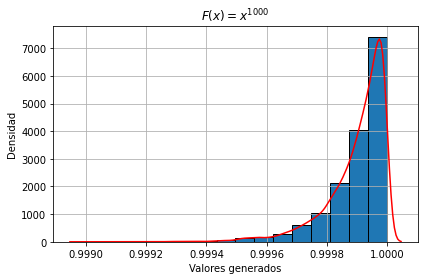

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#bins INDICA EL NUMERO DE INTERVALOS EN EL HISTOGRAMA
#density = True INDICA QUE GRAFIQUE DENSIDAD DE PROBABILIDAD Y NO FRECUENCIAS
plt.hist(x,edgecolor = 'black',bins = 16, density=True) 
plt.title(r'$F(x) = x^{1000}$')
plt.ylabel('Densidad')
plt.xlabel('Valores generados')

sns.distplot(x,hist=False,color = 'red') #DIBUJA LA GRAFICA DE DENSIDAD

plt.grid()
plt.tight_layout()
plt.savefig('Grafico.pdf',format='pdf')

**EJEMPLO**

Si $X$ es una variable aleatoria exponencial de parámetro $\lambda$, $\lambda > 0$. Entonces su función de distribución es estrictamente creciente y está dada por

$$
F(x)= \left\{ \begin{array}{lcc}
             1-e^{-\lambda \cdot X} &   para  & x \geq 0 \\
             \\ 0 &  para & x < 0
             \end{array}
   \right.
$$

Entonces, $F^{-1}\left(U\right) = -\frac{\ln (1-U)}{\lambda}$ y por lo tanto

$$X = -\frac{\ln(1-U)}{\lambda}$$

In [ ]:
def Funcion_Ejemplo_2 (n,lambda_i):
  from random import uniform
  from math import log
  U = list(uniform(0,1) for i in range (n))
  X = list( -(log(1-U[j]))/(lambda_i) for j in range (n))
  return X
x = Funcion_Ejemplo_2(10000,2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


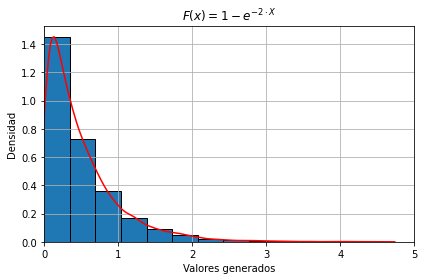

In [ ]:
#bins INDICA EL NUMERO DE INTERVALOS EN EL HISTOGRAMA
#density = True INDICA QUE GRAFIQUE DENSIDAD DE PROBABILIDAD Y NO FRECUENCIAS
plt.hist(x,edgecolor = 'black',bins = 13, density=True) 
plt.xlim(0,5)
plt.title(r'$F(x) = 1-e^{-2\cdot X}$')
plt.ylabel('Densidad')
plt.xlabel('Valores generados')

sns.distplot(x,hist=False,color = 'red') #DIBUJA LA GRAFICA DE DENSIDAD

plt.grid()
plt.tight_layout()
plt.savefig('Grafico.pdf',format='pdf')

## Método de rechazo

Suponga que tenemos un método para generar una variable aleatoria con función de densidad $g(x)$.

Podemos utilizarlo como base para generar a partir de la distribución continua con función de densidad de $f(x)$ : Se genera $Y$ a partir de $g$ y luego se acepta este valor generado con una probabilidad proporcional a $\frac{f(Y)}{g(Y)}$.

En concreto, sea $c$ una constante tal

$$\frac{f(Y)}{g(Y)}\leq c,\forall Y$$

Los pasos a seguir son.

|Paso|Descripción|
|--|--|
|1|Generar $Y$ con densidad $g$|
|2|Generar un número aleatorio $U$|
|3|Sí $U\leq \frac{f(Y)}{c\cdot g(Y)}$ hacemos $X=Y$|
|4|En caso contrario repites 1|

Vamos a tener a consideración los siguientes puntos.

1. La variable aleatoria generada usando el método de aceptación y rechazo tiene densidad $f$.

2. El número de iteraciones del algoritmo que se necesitan, es una variable aleatoria geométrica con media $c$.

**EJEMPLO**

Emplee el método de rechazo para generar una variable aleatoria con función de densidad 

$$f(x) = 20x(1-x)^3$$

Con $x\in (0,1)$

*Solución*

Notemos que la función de densidad es análoga a la distribución beta de la forma

$$f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\cdot\Gamma(\beta)}\cdot x^{\alpha-1}\cdot (1-x)^{\beta-1}$$

Con $x\in (0,1)$.

Por ello tenemos que la variable aleatoria tiene una distribución $\beta(2,4)$, pues $\alpha-1 = 1, \beta-1=3$.

Determinamos el valor de $c$.

Considere $g(x) = 1$ para $x\in (0,1)$.

Sí 

$$\frac{f(x)}{g(x)}\leq c\implies \frac{f(x)}{g(x)}=20x(1-x)^3\leq c$$

Este $c$ es el máximo de la función, por tanto mediante optimización tenemos que

$$\frac{d}{dx}\left(\frac{f(x)}{g(x)} \right) = 20x(-3(1-x)^2) + 20(1-x)^3$$

Aplicamos el Teorema de Fermat

$$\implies 20x(-3(1-x)^2) + 20(1-x)^3 = 0$$

$$\implies x = 1, x = 1, x = \frac{1}{4}$$

Note que 

$$\frac{d^2}{dx^2}\left(\frac{f(x)}{g(x)} \right) = -240x^2+360x-120$$

Del cual tenemos que la segunda derivada evaluada en $x = 1$ es 0, no podemos concluir que sea un mínimo local.

La segunda derivada evaluada en $x = \frac{1}{4}$ es negativo y no podemos concluir que sea mínimo local.

Considerando $-\frac{f(x)}{g(x)}$ tenemos que

$$-\frac{d^2}{dx^2}\left(\frac{f(x)}{g(x)} \right) = 240x^2-360x+120$$

Que evaluando en 1 tenemos 0, no podemos concluir que sea un máximo local de la función, sin embargo para $\frac{1}{4}$ notamos que es mayor a 0 lo que nos indica que $1/4$ es un máximo local de la función $\frac{f(x)}{g(x)}$.

Como $1/4$ es un máximo local de $\frac{f(x)}{g(x)}$ entonces note que se cumple $c = 20(1/4)(1-1/4)^3$

$$\implies \frac{f(x)}{g(x)}\leq \frac{135}{64}$$



$$\implies \frac{64}{135}\cdot \frac{f(x)}{g(x)}\leq 1$$

$$\implies \frac{64}{135}\cdot \frac{20x(1-x)^3}{1}\leq 1$$

$$\implies \frac{256}{27}\cdot x\cdot(1-x)^3\leq 1$$

Además, el número de iteraciones tiene una media de $c \approx 2.1$.

Así el procedimiento acoplado a nuestro problema es

|Paso|Descripción|
|--|--|
|1|Generamos números aleatorios distribuidos uniformemente entre 0 y 1, $U_1,U_2$|
|2|Sí $U_2\leq \frac{256}{27}\cdot U_1\cdot (1-U_1)^3$ hacemos $X = U_1$|
|3|En caso contrario repites 1|

In [ ]:
def Funcion_Ejemplo_3 (n):
  from random import uniform
  from statistics import mean
  L = []
  for i in range (n):
    U1 = uniform(0,1)
    U2 = uniform(0,1)
    while U2 > (256/27)*U1*((1-U1)**3):
      U1 = uniform(0,1)
      U2 = uniform(0,1)
    L.append(U1)
  return [mean(L),L]

In [ ]:
Simu = Funcion_Ejemplo_3(10000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


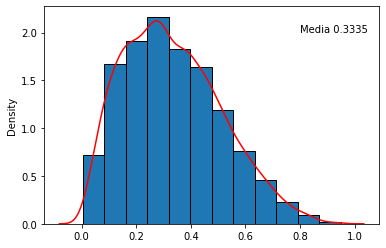

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(Simu[1],density = True,edgecolor = 'black',bins = 12)
plt.text((1+0.6)/2,2,'Media '+str(Simu[0])[0:len('0.0000')] )
sns.distplot(Simu[1],hist=False,color = 'red') #DIBUJA LA GRAFICA DE DENSIDAD

Note que dada la nota 1 se cumple que la variable aleatoria generada tiene una densidad $f$ que comentamos es una beta con $\alpha = 2$ y $\beta = 4$.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


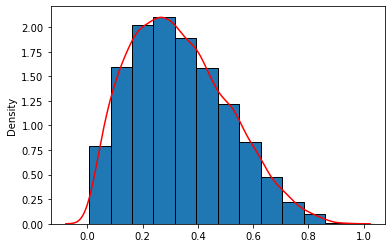

In [ ]:
from random import betavariate
b = list(betavariate(2,4) for i in range (10000))
plt.hist(b,density = True, bins = 12,edgecolor = 'black')
sns.distplot(b,hist=False,color = 'red')

## Generación de un proceso Poisson homogéneo

Los procesos de Poisson son procesos estocásticos de conteo del número de sucesos que ocurren, según una distribución de Poisson, a lo largo del tiempo. Se llama homogéneo pues los eventos tienen la misma probabilidad de ocurrir en todos los intervalos del mismo tamaño.

De esta forma, se pueden representar, por ejemplo, llegadas de clientes a un establecimiento o llegadas de pedidos a un almacén.

Suponga que queremos generar los primeros $n$ tiempos de evento de un proceso Poisson con razón $\lambda$.
Para esto aprovechamos el hecho de que los tiempos entre los eventos consecutivos de dicho proceso son variable aleatorias exponenciales independientes, cada una con razón $\lambda$.

Una forma de generar el procesos es generar estos tiempos entre llegadas.
Así, si generamos $n$ números aleatorios $U_1,\ldots,U_n$ y $X_i = -\frac{1}{\lambda}\cdot \log(U_i)$, entonces $X_i$ se puede considerar como el tiempo entre el $(i-1)$-ésimo y el $i$-ésimo evento en el proceso Poisson.

Como el tiempo real del $j$-ésimo evento será igual a la suma de los primeros $j$ tiempos entre llegadas, los valores generados por los primeros $n$ tiempos de evento son 

$$\sum_{i=1}^jX_I,j=1,\ldots,n$$

**Generación de las primeras $T$ unidades de tiempo de un proceso de Poisson con razón $\lambda$**

|Paso|Descripción|
|--|--|
|1|$$t=0, I = 0$$|
|2|Generamos $U$ distribuido uniformemente entre 0 y 1|
|3|Hacemos $t = t - \frac{1}{\lambda}\log(U)$|
|4|Sí $t>T$ terminamos|
|5|Sí $t\leq T$ hacemos $I = I + 1, S(I) = t$|
|6|Repetimos el paso 2|

Con este algoritmo se generan todos los tiempos de eventos que ocurren en $(0,T)$ de un proceso Poisson con razón $\lambda$.

Donde $t$ se refiere al tiempo, $I$ es el número de eventos que han ocurrido hasta el instante $t$ y $S(I)$ es el tiempo del evento más reciente.

El valor final de $I$ en el algoritmo anterior representa el número de eventos que ocurren hasta el instante $T$, y los valores $S(1),\ldots,S(I)$ serán los $I$ tiempos de evento en orden creciente.

In [ ]:
#LLAMAREMOS A LA FUNCION Pois

def Pois_Hom (T,L):
  from random import uniform
  from math import log
  S = []
  t,I = 0,0
  while True:
    U = uniform(0,1)
    t = t - (1/L)*log(U)
    if t > T:
      break
    else:
      I += 1
      S.append(t)
  return [S,I]

In [ ]:
P = Pois_Hom(9,5)

Los $I$ tiempos de evento en orden creciente que ocurren en $(0,T)$ donde $T = 9$ a un proceso de Poisson con razón $\lambda = 5$ son

In [ ]:
P[0]

[0.017110835542437565,
 0.0638777061345997,
 0.23983882055997593,
 0.25301276141473206,
 0.3568464831702742,
 0.48597748555988085,
 0.6578303845494046,
 0.6941804312568355,
 1.206417537031502,
 2.4675813864125775,
 2.8717703121648377,
 2.893487673877337,
 3.2053557931207672,
 3.7420050552027924,
 3.989238000551894,
 4.18137960032843,
 4.218936300999317,
 4.359619641026453,
 4.532923935275966,
 4.53384253537441,
 4.555975066319046,
 4.742995807835663,
 4.765185176571988,
 4.966828291324093,
 5.795783718496979,
 6.1965192739838075,
 6.489550476766008,
 6.698406191827354,
 6.850358733105538,
 7.773131745554311,
 7.854736764611459,
 7.958664596710592,
 8.024029146036982,
 8.09267955092191,
 8.337985097802052]

El número de eventos, $I$, que ocurren hasta el instante $T = 9$ es 

In [ ]:
P[1]

35

## Generación de un proceso Poisson No Homogéneo

Desde el punto de vista de la modelación, la principal debilidad del proceso Poisson es la hipótesis de que los eventos tienen la misma probabilidad de ocurrir en todos los intervalos del mismo tamaño.

Una generalización, que relaja esta hipótesis, conduce al llamado proceso no homogéneo o no estacionario.

Los **Procesos de Poisson No Homogéneos (NHPP)** son procesos de Poisson pero de incrementos independientes.

$$\{N(t) : t\geq0\}$$

donde $N(t)$ denota el número de «eventos» que ocurre en el instante $t$.

Ellos se debe a que el número de ocurrencias de sucesos en un determinado intervalo, $N(t_2)-N(t_1)$ para $t_1 < t_2$ no sigue una distribución de Poisson de parámetro fijo.

En su lugar, se tiene que para todo $t>0$ y para todo $s>0$

$$N(s+t) - N(s)\text{ es }\rho \left(m(s+t)-m(s)\right)$$

donde $\rho$ denota la distribución Poisson.

A la función $m(t)$ se le denomina *función de valor medio* y se define de la siguiente manera

$$m(t) = \int_0^t\lambda(u) \cdot du$$

Siendo $\lambda(t)$ la función de intensidad del proceso de Poisson. Es decir

$$N(s+t) - N(s) \text{ es }\rho \left(\int_s^{s+t}\lambda(u) \cdot du \right)=\rho \left(\int_0^t \lambda(s+u) \cdot du\right)$$

En particular, un proceso de poisson homogéneo (HPP) de media $\lambda$ es un proceso de poisson no homogéneo (NHPP) con función de intensidad constante $\lambda(t)=\lambda$

**PROPOSICIÓN**

Suponga que se dispone de ocurrencias de sucesos según un HPP de media $\lambda$ y que, independientemente, se realiza un sorteo en el que un suceso, ocurriendo en el instante $t$, puede ser «seleccionado» con probabilidad $p(t)$ o «no seleccionado» con probabilidad $1-p(t)$.

Entonces, el proceso correspondiente a los instantes de los «sucesos seleccionados», es un NHPP con función de intensidad $\lambda(t)=\lambda p(t)$

El procedimiento que se construye a partir de este resultado, denominado de *adelgazamiento (thinning method)* consiste en simular un HPP de media $\lambda$ y seleccionar instantes con probabilidad $p(t) = \frac{\lambda(t)}{\lambda}$ para simular un NHPP con función de intensidad $\lambda(t) = \lambda p(t)$

**NOTA**

Si se pretende simular instantes hasta $T$, se debe satisfacer que

$$\frac{\lambda(t)}{\lambda}\leq 1,t\in [0,T]\implies \lambda(t)\leq\lambda,t\in[0,T]$$

Entonces solo se podrá simular, por este procedimiento, los NHPP con función de intensidad $\lambda(t)$ acotada.

El siguiente algoritmo simula instantes entre 0 y $T$ según un NHPP con función de intensidad $\lambda(t)\leq\lambda$ para todo $t\in [0,T]$



```
Hacer t = 0
Hacer I = 0
*Repetir*
  Simular U_1 con Dist. Uniform. (0,1)
  Hacer t = t - (ln(U_1)/Lambda)
  Si t> T Entonces paramos, Termina el Si
  Simulamos U_2 con Dist. Uniform. (0,1)
  Si U_2 <= Lambda(t)/Lambda entonces
  hacemos I += 1, S(I) = t, Termina el Si
*Termina Repetir*
```



**EJEMPLO**

Se requiere generar un NHPP con $T = 9$ a la siguiente función de intensidad (en horas)

$$f(t)= \left\{ \begin{array}{lcc}
             5+5t &   si  & 0\leq t\leq3 \\
             \\ 20 &  si & 3< t\leq 5 \\
             \\ 20-2(t-5) &  si  & 5 < t \leq 9
             \end{array}
   \right.$$

Tomando $\lambda = 20$

*Solución*

Para crear funciones partidas en Python usamos la función «piecewise» de NumPy.

Sintaxis.

```
np.piecewise(x, logls, funls)
```

Donde $x$ es un arreglo que define la variable independiente, $logls$ una lista de condiciones lógicas para seccionar y definir los subintervalos, y $funls$ una lista de funciones o constantes que definen el valor de la función para el subintervalo correspondiente.

Graficaremos la función partida dada

In [ ]:
import numpy as np
t = np.linspace(0, 9) #ACOTAMOS EL DOMINIO A LOS REALES POSITIVOS

y = np.piecewise(t, #EJE X
                 [np.array((0<=t) & (t<=3)), #CONDICION FUNCION 1
                  np.array((3<t) & (t<=5)), #CONDICION FUNCION 2
                  np.array((5<t) & (t<=9))], #CONDICION FUNCION 3
                 [lambda t: 5+5*t, #FUNCION 1
                  lambda t: 20, #FUNCION 2
                  lambda t: 20 - 2*(t-5)]) #FUNCION 3

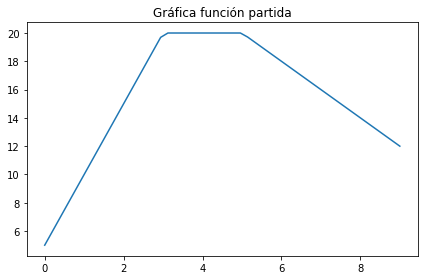

In [ ]:
plt.plot(t,y)
plt.title('Gráfica función partida')
plt.tight_layout()

Diseñamos una función que varíe los valores del eje X pero mantenga las condiciones de la función partida dada.

In [ ]:
def Ejemplo_F_P (x):
  import numpy as np
  return np.piecewise(x, #EJE X
                 [np.array((0<=x) & (x<=3)), #CONDICION FUNCION 1
                  np.array((3<x) & (x<=5)), #CONDICION FUNCION 2
                  np.array((5<x) & (x<=9))], #CONDICION FUNCION 3
                 [lambda x: 5+5*x, #FUNCION 1
                  lambda x: 20, #FUNCION 2
                  lambda x: 20 - 2*(x-5)]) #FUNCION 3

Definimos una función general

In [ ]:
def Pois_No_Hom (T,L_f,L):
  from random import uniform
  from math import log
  t, I, S = 0, 0, []
  while True:
    U_1 = uniform(0,1)
    t = t - (log(U_1)/L)
    if t > T:
      break
    else:
      U_2 = uniform(0,1)
    if U_2 <= L_f(t)/L:
      I += 1
      S.append(t)
  return [S,I]

Graficamos un histograma del conjunto de datos y la función partida.

In [ ]:
Data = Pois_No_Hom(9,Ejemplo_F_P,20)

El valor de $I$ es

In [ ]:
Data[1]

141

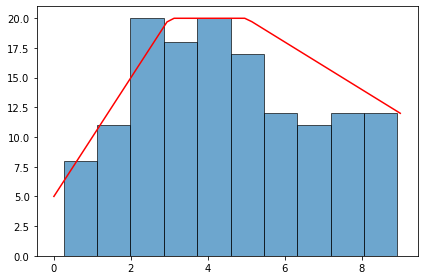

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Data[0],edgecolor = 'black',alpha = 0.65)
plt.plot(t,y,color = 'red')
plt.tight_layout()